# Many to many relationships
- 한 테이블의 0개 이상의 레코드가 다른 테이블의 0개 이상의 레코드와 관련된 경우 **양쪽 모두에서 N:1 관계를 가짐**

## N:1의 한계

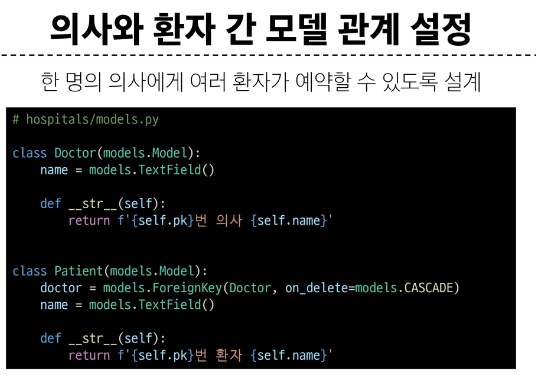

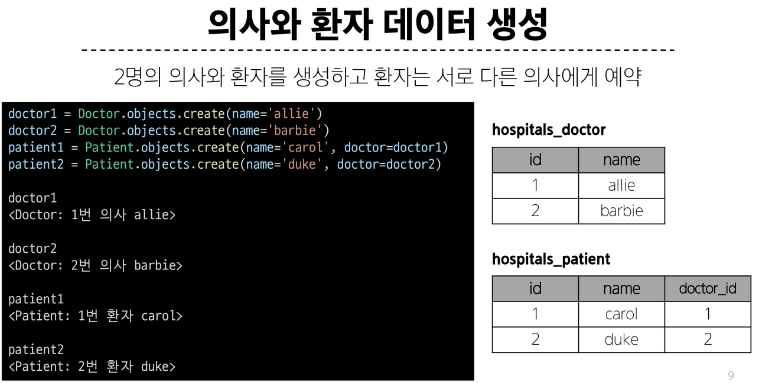

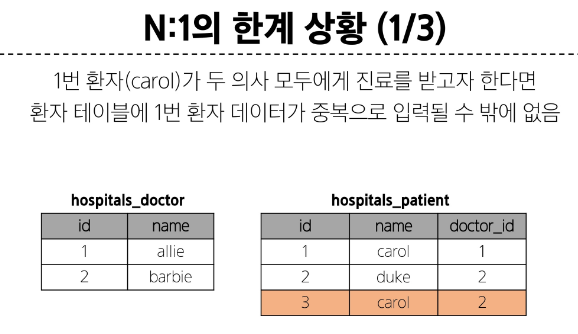

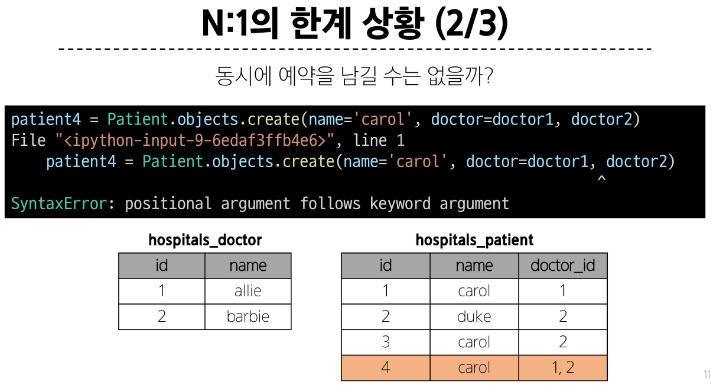

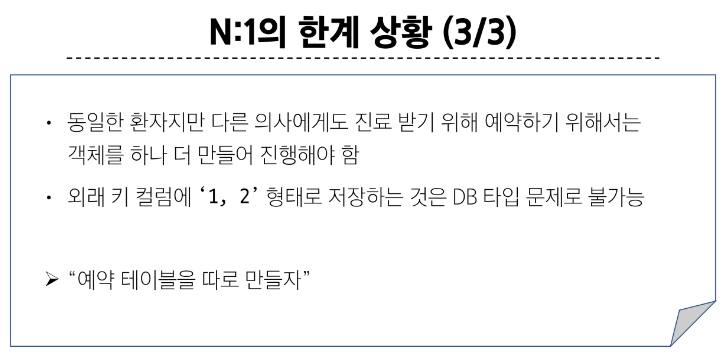

## 중개 모델

1. 예약 모델 생성
    - 환자 모델의 외래 키를 삭제하고 별도의 예약 모델을 새로 생성

    - 예약 모델은 의사와 환자에 각각 N:1 관계를 가짐

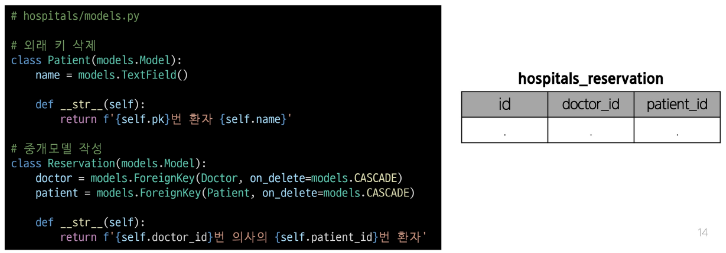

2. 예약 데이터 생성
    - 데이터베이스 초기화 후 Migration 진행 및 shell_plus 실행

    - 의사와 환자 생성 후 예약 만들기

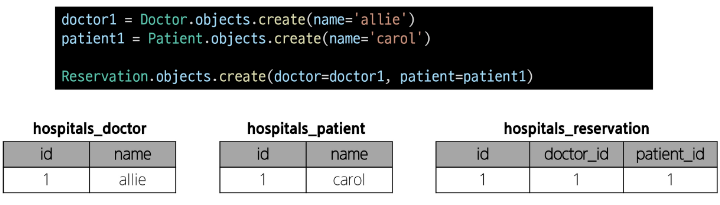

3. 예약 정보 조회
    - 의사와 환자가 예약 모델을 통해 각각 본인의 진료 내역 확인

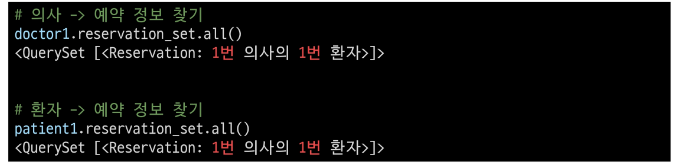

4. 추가 예약 생성
    - 1번 의사에게 새로운 환자 예약 생성 

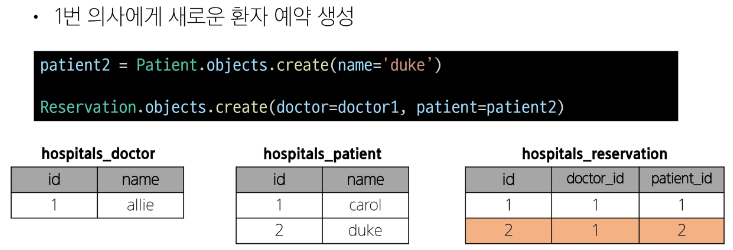

5. 예약 정보 조회
    - 1번 의사의 예약 정보 조회

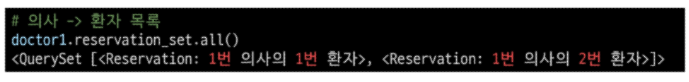

- Django에서는 'ManyToManyField'로 중개모델을 자동으로 생성 

<hr>

## ManyToManyField
- ManyToManyField() : M:N 관계 설정 모델 필드

### Django ManyToManyField
1. 환자 모델에 ManyToManyField 생성
    - 의사 모델에 작성해도 상관 없으며 참조/역참조 관계만 잘 기억할 것

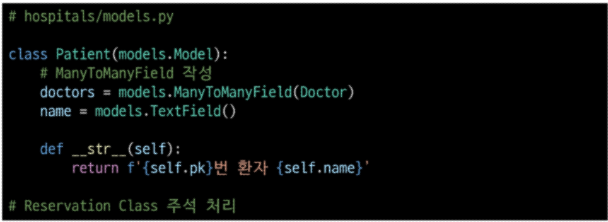

2. 데이터 베이스 초기화 후 Migration 진행 및 shell_plus 진행 
    - 생성된 중개 테이블 hospitals_patient_doctors 확인

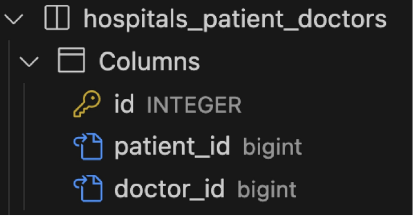

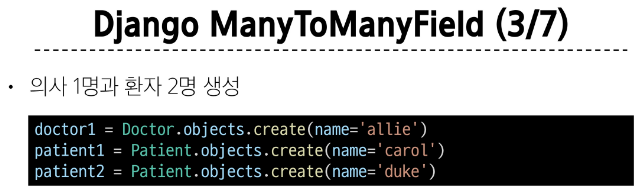

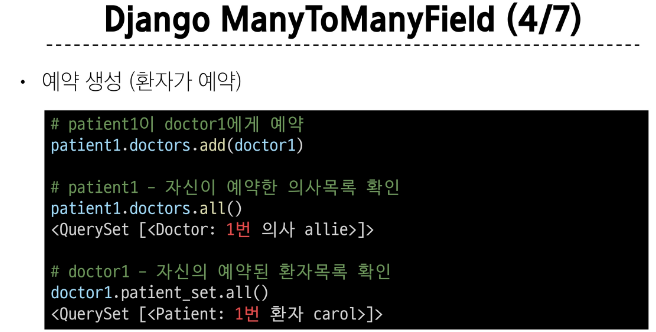

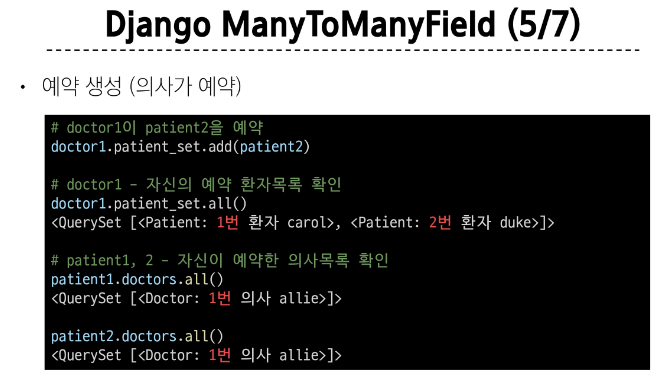

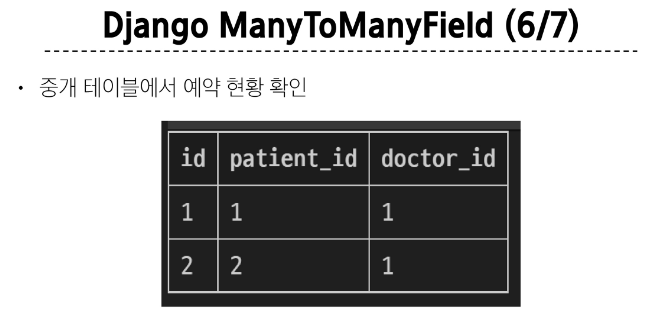

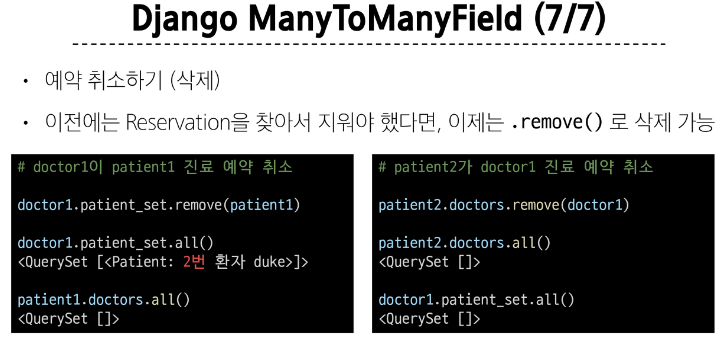

<hr>

## 'through' argument
- 중개 테이블에 **추가 데이터**를 사용해 M:N 관계를 형성하려는 경우에 사용

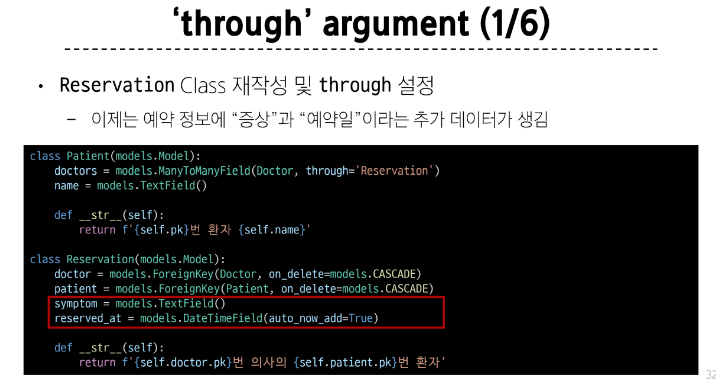

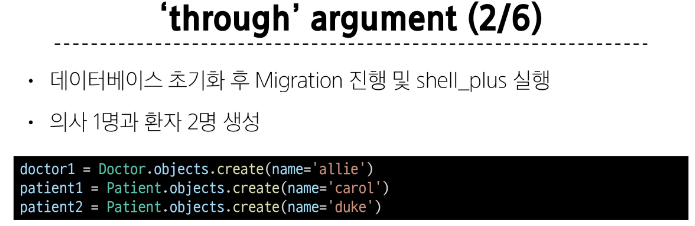

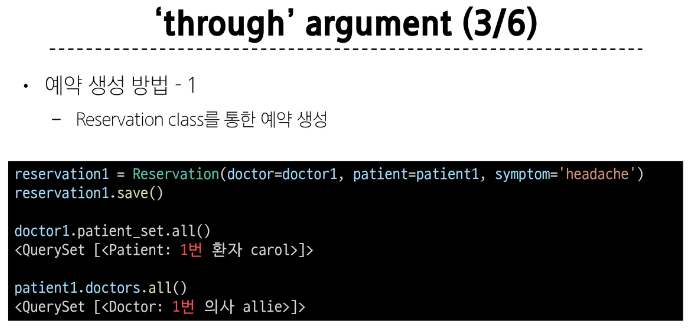

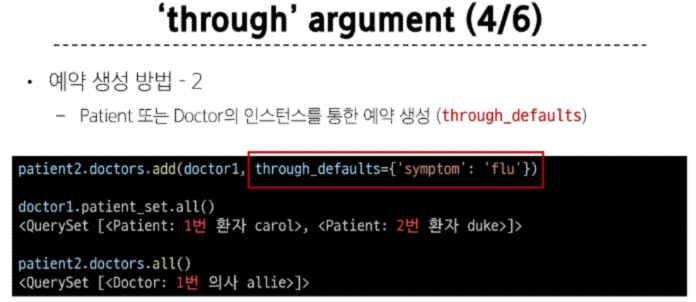

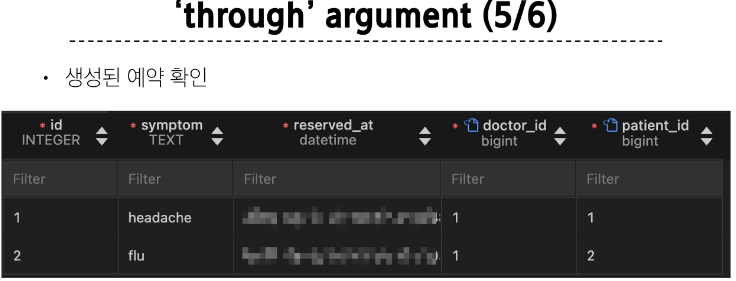

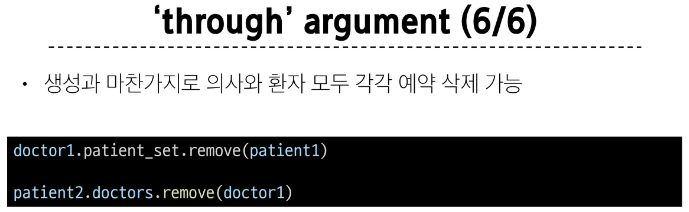

### M:N 관계 주요 사항
- M:N 관계로 맺어진 두 테이블에는 물리적인 변화가 없음

- ManyToManyField는 중개 테이블을 자동으로 생성

- ManyToManyField는 M:N 관계를 맺는 두 모델 어디에 위치해도 상관없음
    - 대신 필드 작성 위치에 따라 참조와 역참조 방향을 주의할 것

- N:1은 완전한 종속의 관계였지만 M:N은 종속적인 관계가 아니며 '의사에게 진찰받는 환자 & 환자를 진찰하는 의사' 이렇게 2가지 형태 모두 표현 가능

## ManyToManyField
- ManyToManyField(to, **options) : M:N 관계 설정 시 사용하는 모델 필드

### ManyToManyField 특징
- 양방향 관계 : 어느 모델에서든 관련 객체에 접근할 수 있음

- 중복 방지 : 동일한 관계는 한 번만 저장됨

### ManyToManyField의 대표 인자 3가지
1. related_name

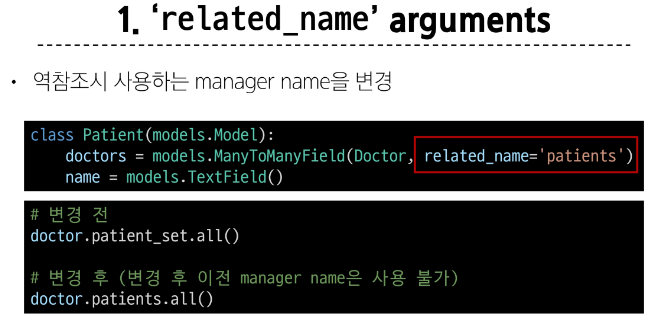

2. symmetrical

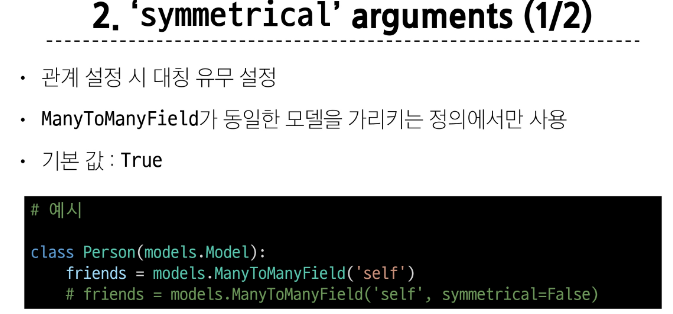

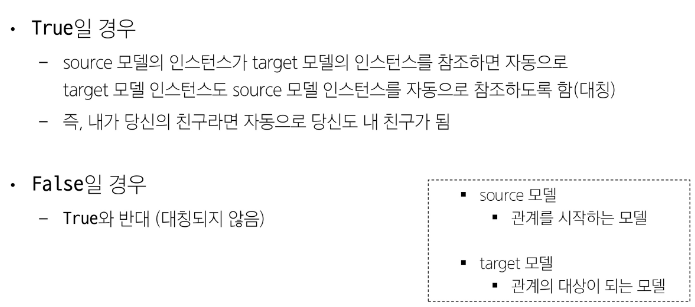

3. through

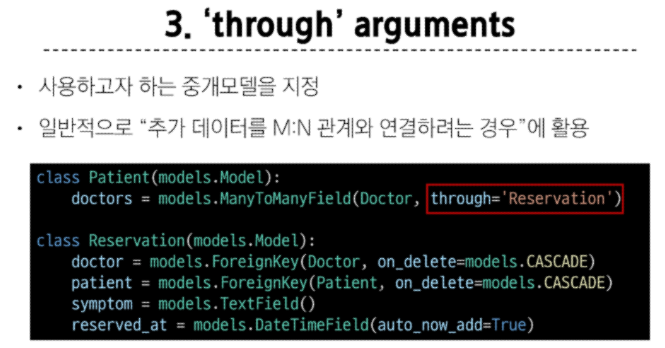

### M:N에서의 대표 조작 methods 
- add()
    - 관계 추가

    - "지정된 객체를 관련 객체 집합에 추가'

- remove()
    - 관계 제거

    - "관련 객체 집합에서 지정된 모델 객체를 제거"

<hr>

## 좋아요 기능 구현 
### 모델 관계 설정

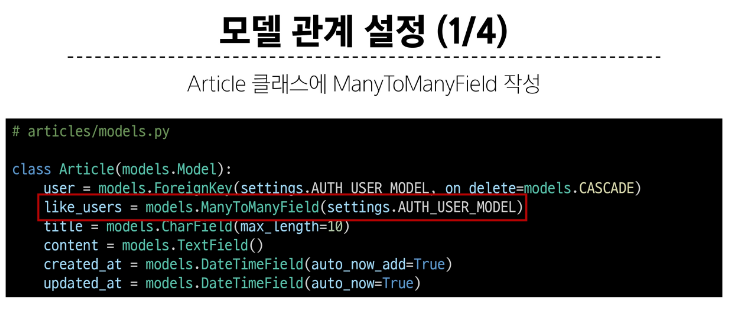

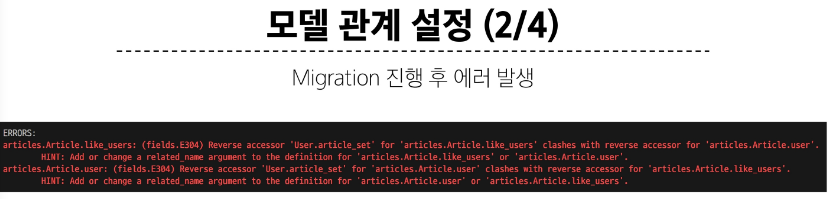

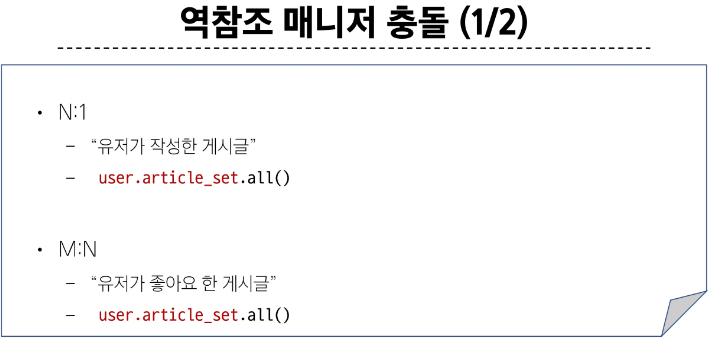

- 역참조 매니저 충돌
    - like_users 필드 생성 시 자동으로 역참조 매니저 .article_set가 생성됨

    - 그러나 이전 N:1(Article-User) 관계에서 이미 같은 이름의 매니저를 사용 중 
        - user.article_set.all() : 해당 유저가 작성한 모든 게시글 조회

    - 'user가 작성한 글(user.article_set)'과 'user가 좋아요를 누른 글(user.article_set)'을 구분할 수 없게 됨

    - user와 관계된 ForeignKey 혹은 ManytoManyField 둘 중 하나에 related_name 작성 필요

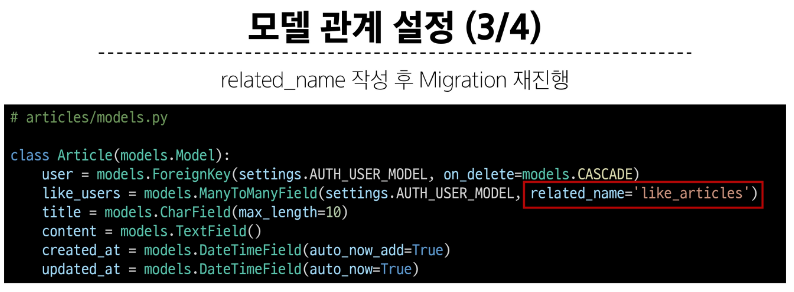

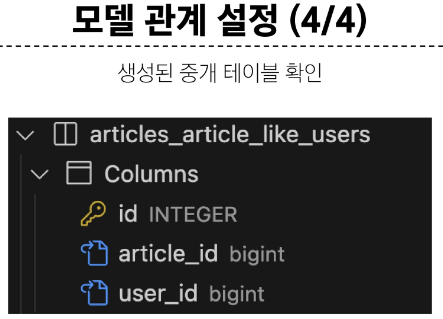

### User - Article 간 사용 가능한 전체 related manager
- article.user : 게시글을 작성한 유저 N:1

- user.article_set : 유저가 작성한 게시글(역참조) N:1

- article.like_users : 게시글을 좋아요 한 유저 M:N

- user.like_articles : 유저가 좋아요 한 게시글(역참조) M:N

<hr>

## 기능 구현

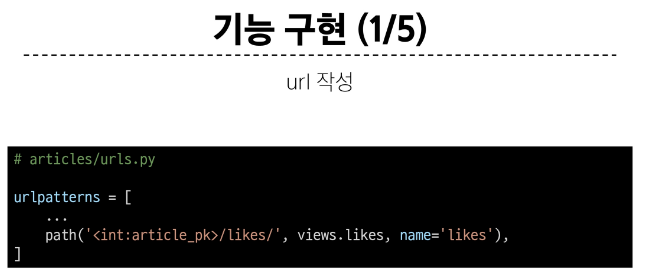

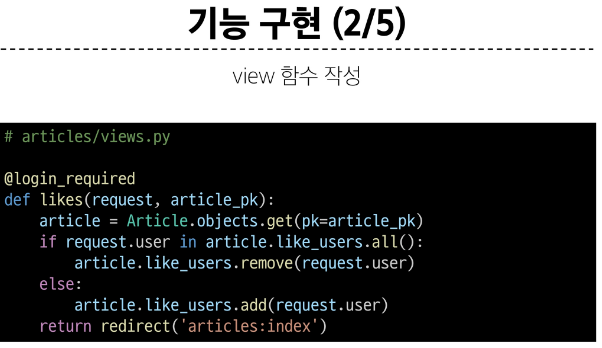

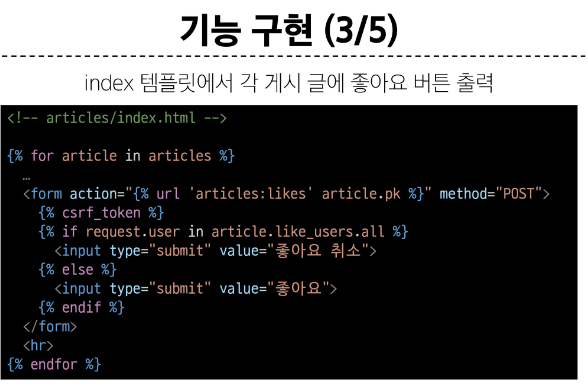

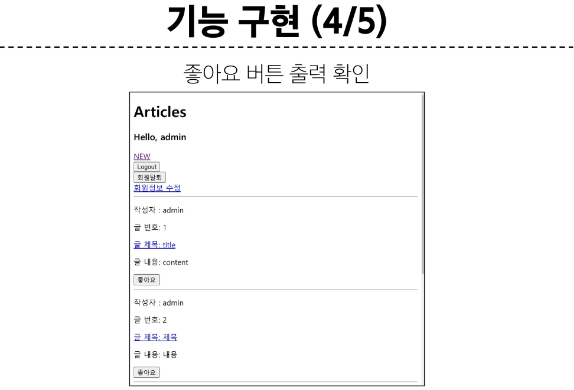

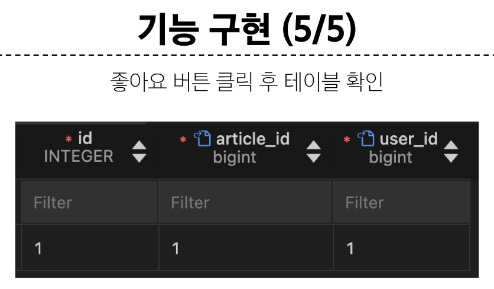